In [19]:
## IMPORT PACKAGES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# create dummy data and classifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
# key metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
# roc and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# f score 
from sklearn.metrics import f1_score


## CREATE DUMMY DATA 

data_X, class_label = make_classification(n_samples = 1000, n_features = 5, n_classes = 2) # generates a random n-class classification problem
trainX, testX, trainy, testy = train_test_split(data_X, class_label, test_size=0.3) # creates training and test sets


## CREATE DESCISION TREE

model = DecisionTreeClassifier() 
model.fit(trainX, trainy)


## CREATE NEW PREDICTIONS

predictions = model.predict_proba(testX)[:, 1] 




In [20]:
## CALCULATE ACCURACY
accuracy = accuracy_score(testy , predictions)

print(accuracy)


0.8966666666666666


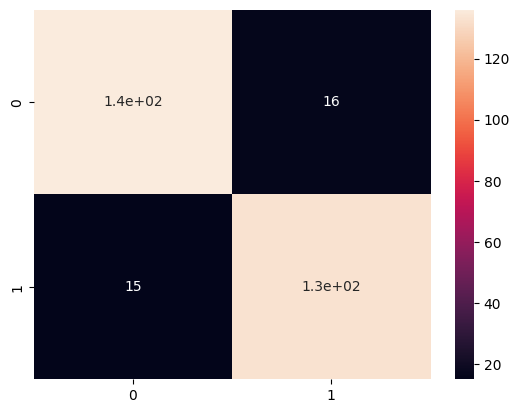

In [21]:
## CREATE CONFUSION MATRIX
CM = confusion_matrix(testy , predictions)
sns.heatmap(pd.DataFrame(CM), annot=True)

TN, FP, FN, TP = CM.ravel() # students do not need to do this, but good for you to have if they ask

In [22]:
## CALCUATE PRECISION, RECALL AND SPECIFICITY
precision = TP/(TP+FP)
recall = TP/(TP+FN) 
specificity = TN/(TN+FP)

print("Precision is:",precision)
print("Recall/sensitivity is:",recall)
print("Specificity is:",specificity)

Precision is: 0.8926174496644296
Recall/sensitivity is: 0.8986486486486487
Specificity is: 0.8947368421052632


In [23]:
## CALCULATE AUC

auc = roc_auc_score(testy, predictions)
print('AUC: %f' %auc)


AUC: 0.896693


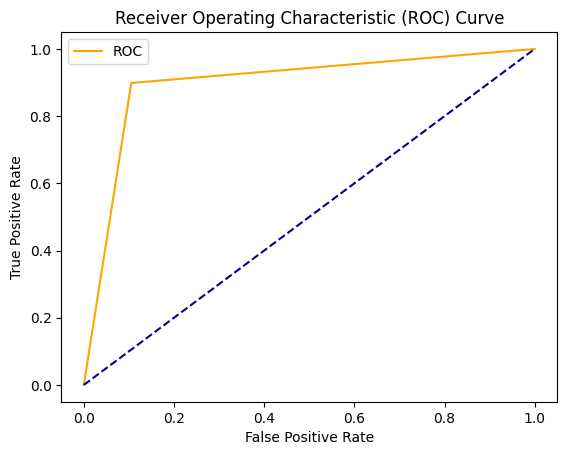

In [24]:
## PLOT ROC CURVE

fpr, tpr,threshold = roc_curve(testy, predictions)

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [25]:
## CALCULATE F SCORE 

fscore = f1_score(testy, predictions)
print('F Score: %f' %fscore)

#meanAbError = 

F Score: 0.895623


AUC: 0.896693


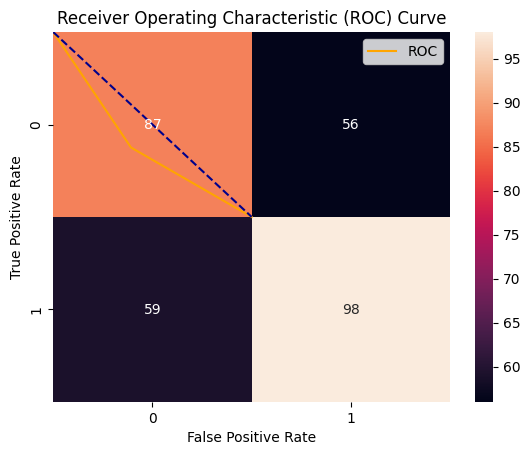

F Score: 0.630225


In [26]:
## CREATE ANOTHER MODEL AND COMPARE THE TWO 

data_X_mod2, class_label_mod2 = make_classification(n_samples = 1000, n_features = 5, n_classes = 2, flip_y = 0.5) 
trainX_mod2, testX_mod2, trainy_mod2, testy_mod2 = train_test_split(data_X_mod2, class_label_mod2, test_size=0.3)

model_mod2 = DecisionTreeClassifier() 
model_mod2.fit(trainX_mod2, trainy_mod2)

predictions_mod2 = model_mod2.predict_proba(testX_mod2)[:, 1] 

accuracy_score(testy_mod2,predictions_mod2)

CM_mod2 = confusion_matrix(testy_mod2 , predictions_mod2)
sns.heatmap(pd.DataFrame(CM_mod2), annot=True)

auc_mod2 = roc_auc_score(testy, predictions)
print('AUC: %f' %auc_mod2)

fpr_mod2, tpr_mod2 = roc_curve(testy_mod2, predictions_mod2)[0:2]
plt.plot(fpr_mod2, tpr_mod2, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

fscore_mod2 = f1_score(testy_mod2, predictions_mod2)
print('F Score: %f' %fscore_mod2)